In [87]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
import random
device = 'cuda' if torch.cuda.is_available() else 'cpu'
import os,sys
opj = os.path.join
from tqdm import tqdm
import acd
from copy import deepcopy
from model_GMM import init_specific_model
from losses_GMM import BetaLoss, BtcvaeLoss
from dset_GMM import get_dataloaders
from training import Trainer
from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


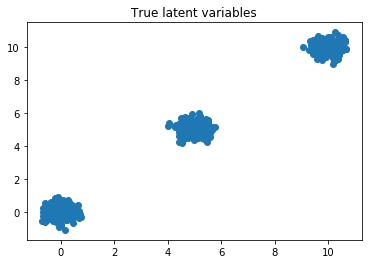

In [88]:
# GET DATALOADERS
train_loader, train_latents = get_dataloaders(n_samples_per_cluster=5000, 
                                              batch_size=100, 
                                              shuffle=True,
                                              return_latents=True)
test_loader, test_latents = get_dataloaders(n_samples_per_cluster=200, 
                                            batch_size=100, 
                                            shuffle=False,
                                            return_latents=True)

# PLOT LATENT VARIABLES
plot_2d_samples(test_latents)
plt.title('True latent variables')
plt.show()

In [89]:
# PREPARES MODEL
model = init_specific_model(orig_dim=10, latent_dim=2)
model = model.to(device)

# TRAINS
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
beta = 1.0
loss_f = BetaLoss(beta=beta)

trainer = Trainer(model, optimizer, loss_f, device=device)
trainer(train_loader, test_loader, epochs=60)

# SAVE MODEL
save_dir = "results"
os.makedirs(save_dir, exist_ok=True)

name = "beta" + str(beta)
torch.save(model.state_dict(), opj(save_dir, name)) 

====> Epoch: 0 Average train loss: 73.9160 (Test set loss: 44.8894)
====> Epoch: 1 Average train loss: 20.3186 (Test set loss: 9.3158)
====> Epoch: 2 Average train loss: 6.5284 (Test set loss: 4.9676)
====> Epoch: 3 Average train loss: 4.1777 (Test set loss: 3.7157)
====> Epoch: 4 Average train loss: 3.3377 (Test set loss: 3.1566)
====> Epoch: 5 Average train loss: 2.9198 (Test set loss: 2.8445)
====> Epoch: 6 Average train loss: 2.6741 (Test set loss: 2.6455)
====> Epoch: 7 Average train loss: 2.5151 (Test set loss: 2.5146)
====> Epoch: 8 Average train loss: 2.4063 (Test set loss: 2.4236)
====> Epoch: 9 Average train loss: 2.3268 (Test set loss: 2.3579)
====> Epoch: 10 Average train loss: 2.2657 (Test set loss: 2.3013)
====> Epoch: 11 Average train loss: 2.2169 (Test set loss: 2.2599)
====> Epoch: 12 Average train loss: 2.1780 (Test set loss: 2.2221)
====> Epoch: 13 Average train loss: 2.1457 (Test set loss: 2.1932)
====> Epoch: 14 Average train loss: 2.1180 (Test set loss: 2.1685)
==

In [103]:
trainer(train_loader, test_loader, epochs=60)

====> Epoch: 0 Average train loss: 1.6739 (Test set loss: 1.7282)
====> Epoch: 1 Average train loss: 1.6693 (Test set loss: 1.7220)
====> Epoch: 2 Average train loss: 1.6656 (Test set loss: 1.7165)
====> Epoch: 3 Average train loss: 1.6611 (Test set loss: 1.7125)
====> Epoch: 4 Average train loss: 1.6569 (Test set loss: 1.7088)
====> Epoch: 5 Average train loss: 1.6541 (Test set loss: 1.7036)
====> Epoch: 6 Average train loss: 1.6488 (Test set loss: 1.7030)
====> Epoch: 7 Average train loss: 1.6455 (Test set loss: 1.6987)
====> Epoch: 8 Average train loss: 1.6426 (Test set loss: 1.6902)
====> Epoch: 9 Average train loss: 1.6393 (Test set loss: 1.6901)
====> Epoch: 10 Average train loss: 1.6363 (Test set loss: 1.6855)
====> Epoch: 11 Average train loss: 1.6333 (Test set loss: 1.6883)
====> Epoch: 12 Average train loss: 1.6308 (Test set loss: 1.6788)
====> Epoch: 13 Average train loss: 1.6279 (Test set loss: 1.6788)
====> Epoch: 14 Average train loss: 1.6262 (Test set loss: 1.6736)
====>

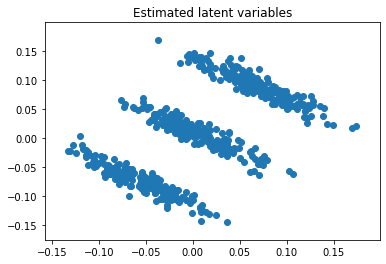

In [104]:
# EVALUATE TEST DATA
data = test_loader.dataset.data.to(device)
recon_data, latent_dist, latent_sample = model(data)

plot_2d_samples(latent_sample.detach().cpu()[:,:2])
plt.title('Estimated latent variables')
plt.show()

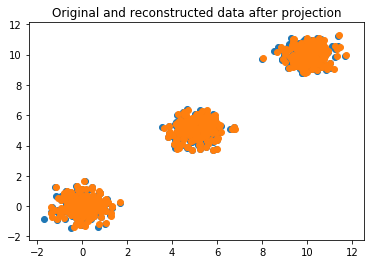

In [105]:
plot_2d_samples(data.detach().cpu()[:,:2])
plot_2d_samples(recon_data.detach().cpu()[:,:2])
plt.title('Original and reconstructed data after projection')
plt.show()

In [106]:
print('Pen: {:.8f}'.format(trainer._comp_latent_pen(latent_sample, data).item()))

Pen: 0.45389545


###  PLOT TRAVERSALS

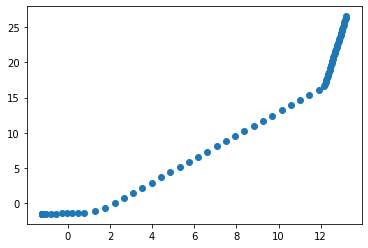

In [107]:
# GET TRAVERSAL
decoded_traversal = traversals(model, data=None)

# PROJECTION to FIRST TWO COORDINATES
decoded_traversal0 = decoded_traversal[:,:2]
plot_2d_samples(decoded_traversal0[:100])

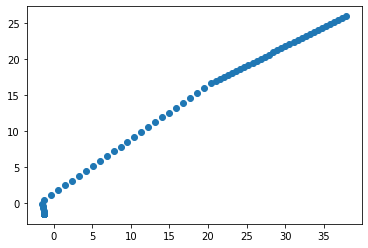

In [108]:
plot_2d_samples(decoded_traversal0[100:])

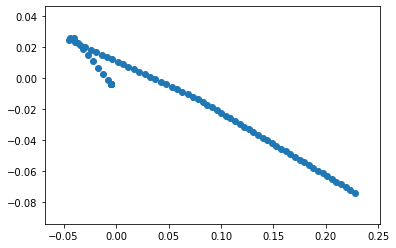

In [109]:
# PROJECTION to SECOND TWO COORDINATES
decoded_traversal1 = decoded_traversal[:,2:4]
plot_2d_samples(decoded_traversal1[:100])

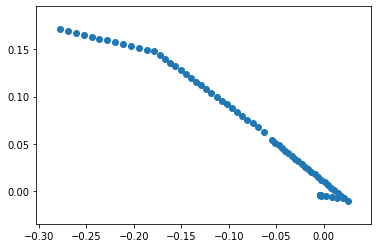

In [110]:
plot_2d_samples(decoded_traversal1[100:])

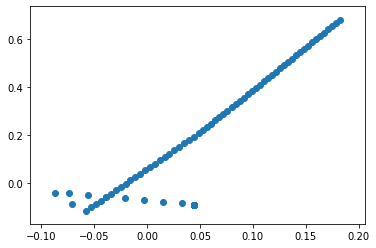

In [111]:
# PROJECTION to THIRD TWO COORDINATES
decoded_traversal2 = decoded_traversal[:,4:6]
plot_2d_samples(decoded_traversal2[:100])

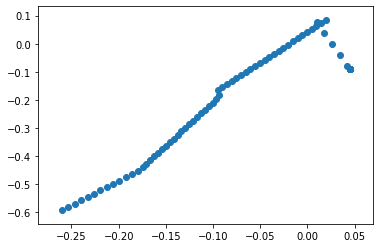

In [112]:
plot_2d_samples(decoded_traversal2[100:])

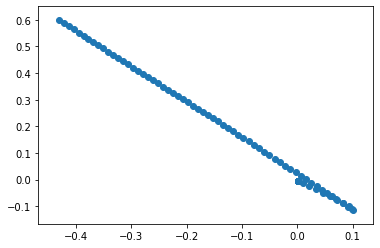

In [113]:
# PROJECTION to FOURTH TWO COORDINATES
decoded_traversal3 = decoded_traversal[:,6:8]
plot_2d_samples(decoded_traversal3[:100])

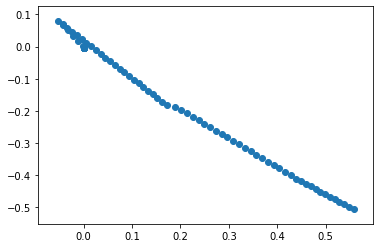

In [114]:
plot_2d_samples(decoded_traversal3[100:])

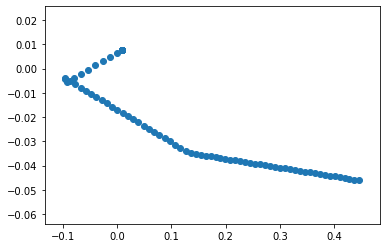

In [115]:
# PROJECTION to FIFTH TWO COORDINATES
decoded_traversal4 = decoded_traversal[:,8:10]
plot_2d_samples(decoded_traversal4[:100])

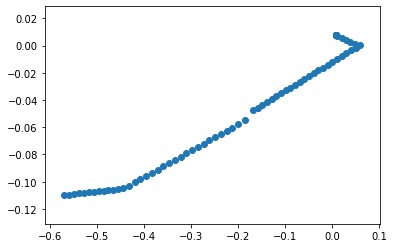

In [116]:
plot_2d_samples(decoded_traversal4[100:])